<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/DPHI_COVID_Select_keras_pretrained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1BFc2Lt2N1swO8BKRvLMEyUhLzF52RFvr',
dest_path='content/covid_image_data.zip',
unzip=True)

Unzipping...Done.


In [ ]:
import pandas as pd # Data analysis and manipultion tool
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf # Deep Learning Tool
import os # OS module in Python provides a way of using operating system dependent functionality
import cv2 # Library for image processing
from sklearn.model_selection import train_test_split # For splitting the data into train and validation set
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
labels = pd.read_csv("/content/content/covid_image_data/Training_set_covid.csv")

labels.head() 
file_paths = [[fname, '/content/content/covid_image_data/train/' + fname] for fname in labels['filename']]

if len(labels) == len(file_paths):
  print('Number of labels i.e. ', len(labels), 'matches the number of filenames i.e. ', len(file_paths))
else:
  print('Number of labels does not match the number of filenames')

images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
images.head()


train_data = pd.merge(images, labels, how = 'inner', on = 'filename')
train_data.head()

Number of labels i.e.  3479 matches the number of filenames i.e.  3479


,filename,filepaths,label
0,Image_1.jpg,/content/content/covid_image_data/train/Image_...,1
1,Image_2.jpg,/content/content/covid_image_data/train/Image_...,0
2,Image_3.jpg,/content/content/covid_image_data/train/Image_...,0
3,Image_4.jpg,/content/content/covid_image_data/train/Image_...,0
4,Image_5.jpg,/content/content/covid_image_data/train/Image_...,0


In [ ]:
train_data[train_data['label'] == 0].shape,train_data[train_data['label'] == 1].shape

((3073, 3), (406, 3))

In [ ]:
train_data0 = train_data[train_data['label'] == 0].sample(n=406,random_state=42)

In [ ]:
train_data0.shape

(406, 3)

In [ ]:
train_data1 = train_data[train_data['label'] == 1]

In [ ]:
train_data = pd.concat([train_data0,train_data1])

In [ ]:
train_data.shape

(812, 3)

In [ ]:
train_data = train_data.reset_index()
train_data = train_data.drop('index',axis=1)

In [ ]:
train_data = train_data[['filename','filepaths','label']]
train_data.head()

,filename,filepaths,label
0,Image_3045.jpg,/content/content/covid_image_data/train/Image_...,0
1,Image_2003.jpg,/content/content/covid_image_data/train/Image_...,0
2,Image_2862.jpg,/content/content/covid_image_data/train/Image_...,0
3,Image_229.jpg,/content/content/covid_image_data/train/Image_...,0
4,Image_276.jpg,/content/content/covid_image_data/train/Image_...,0


In [ ]:
test_image_order = pd.read_csv("/content/content/covid_image_data/Testing_set_covid.csv")
test_image_order.head()

file_paths_test = [[fname, '/content/content/covid_image_data/test/' + fname] for fname in test_image_order['filename']]

test_images = pd.DataFrame(file_paths_test, columns=['filename', 'filepaths'])
test_images.head()


,filename,filepaths
0,Image_1.jpg,/content/content/covid_image_data/test/Image_1...
1,Image_2.jpg,/content/content/covid_image_data/test/Image_2...
2,Image_3.jpg,/content/content/covid_image_data/test/Image_3...
3,Image_4.jpg,/content/content/covid_image_data/test/Image_4...
4,Image_5.jpg,/content/content/covid_image_data/test/Image_5...


In [ ]:
data = [] 
image_size = 331
test_pixel_data = []

for i in range(len(train_data)):

  img_array = cv2.imread(train_data['filepaths'][i], cv2.COLOR_BGR2RGB) 

  new_img_array = cv2.resize(img_array, (image_size, image_size))
  #new_img_array = cv2.GaussianBlur(new_img_array,(5,5),0)
  data.append([new_img_array, train_data['label'][i]])


for i in range(len(test_images)):

  img_array = cv2.imread(test_images['filepaths'][i], cv2.COLOR_BGR2RGB) 

  new_img_array = cv2.resize(img_array, (image_size, image_size))
  #new_img_array = cv2.GaussianBlur(new_img_array,(5,5),0)
  test_pixel_data.append(new_img_array)

In [ ]:
print(len(data),len(test_pixel_data))

812 870


In [ ]:
np.random.shuffle(data)

In [ ]:
x = []
y = []

counter = 406

for image in data:
  # if image[1] == 0 and counter >= 0:
  #   x.append(image[0])
  #   y.append(image[1])
  #   counter -= 1

  # elif image[1] == 1:
  #   x.append(image[0])
  #   y.append(image[1])


  x.append(image[0])
  y.append(image[1])

# converting x & y to numpy array as they are list
x = np.array(x)
y = np.array(y)

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1]), array([3073,  406]))

In [ ]:
 pd.Series(y).value_counts()

0    3073
1     406
dtype: int64

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(x,y,test_size=0.1, random_state = 42,stratify=y)

In [ ]:
test_pixel_data = np.array(test_pixel_data)

test_pixel_data = test_pixel_data/255

print(X_train.shape,X_val.shape,test_pixel_data.shape)

(730, 331, 331, 3) (82, 331, 331, 3) (870, 331, 331, 3)


In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow(X_train,y_train,batch_size=32)

val_generator = val_datagen.flow(X_val,y_val,batch_size=32)

In [ ]:
pd.Series(y_val).value_counts(normalize=True)

0    0.883621
1    0.116379
dtype: float64

In [ ]:
pd.Series(y_train).value_counts(normalize=True)

0    0.88322
1    0.11678
dtype: float64

In [ ]:
print(X_train.shape,X_val.shape)

(730, 331, 331, 3) (82, 331, 331, 3)


In [ ]:
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val


In [ ]:
cbs = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-5, verbose=0),
           tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-6, patience=4, verbose=1, mode='auto')]

# lr = tf.keras.callbacks.ReduceLROnPlateau(
#     monitor="val_loss",
#     factor=0.1,
#     patience=2,
#     verbose=0,
#     mode="auto",
#     min_delta=0.0001,
#     cooldown=0,
#     min_lr=0.00001,
# )

In [ ]:
from keras.applications import VGG16,VGG19,NASNetLarge,DenseNet201
from keras.layers import *
from keras.models import Sequential
from keras.regularizers import *
from keras.optimizers import Adam

**This is the densenet architecture that scores a F1 Score of 91.4572864321608 on submission. Here I have reduced the number of dense layer or fully connected layer and it improved the scores from 88.55721393034825 in case of 3 fully connected layer to 91.4572864321608**

In [ ]:
initializer = tf.keras.initializers.he_normal(seed=32)

In [ ]:
def build_model():
    model = Sequential()
    
    conv_base = NASNetLarge(input_shape=(331,331,3), include_top=False, pooling='max',weights='imagenet')
    model.add(conv_base)
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    #for layer in model.layers:
    #  layer.trainable = True
    train_layers = [layer for layer in conv_base.layers[::-1][:5]]
    
    for layer in conv_base.layers:
      if layer in train_layers:
        layer.trainable = True
    
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy',get_f1])
    
    return model



In [ ]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Functional)          (None, 4032)              84916818  
_________________________________________________________________
flatten (Flatten)            (None, 4032)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               2064896   
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

#### **New run without change in parameters to try out different threshold values of prediction probability  run-2**

In [ ]:
model.fit(train_generator,
          steps_per_epoch=10,
          epochs=25,
          validation_data=val_generator,
          validation_steps=10,
          callbacks=[cbs],
          class_weight={0:1,1:2})

Epoch 1/25


ResourceExhaustedError: ignored

In [ ]:
preds = model.predict(test_pixel_data)
#
predictions = []
for i in preds:
  if i[0] >= 0.52:
    predictions.append(1)
  else:
    predictions.append(0)
#
result = pd.DataFrame(predictions,columns=['prediction'])
#
print(result.value_counts())
#
result.to_csv('denseNet201.csv',index=False)

prediction
0             762
1             108
dtype: int64


threshold 32 : 90.90909090909089

threshold 31 : 90.49773755656109

threshold 38: 91.32420091324201

threshold 50 : 89.81481481481481

In [ ]:
import random
threshold_list = []
for i in range(10):
  threshold_list.append(random.uniform(0.49, 0.50))

In [ ]:
threshold_list

[0.4904089180098008,
 0.49295673199614287,
 0.49445799594490364,
 0.49300604128345055,
 0.49720410762675477,
 0.49774674375093764,
 0.49288225069387265,
 0.4961237429887291,
 0.49381072519431807,
 0.49848581878449216]

In [ ]:
preds =  model.predict(X_val/255.0)
predictions = []
f1score = []
threshold_dict = {}
for j in threshold_list:
  for i in preds:
    if i > j:
      predictions.append(1)
    else:
      predictions.append(0)
  fscore = f1_score(y_val,predictions)
  print(fscore)
  #threshold_dict[j] = f1_score(y_val,predictions)


NameError: ignored

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_val,predictions)

0.8142857142857142

#### **Previous Run -1 which gave a score of 91.45%**

In [ ]:
model.fit(train_generator,steps_per_epoch=87,epochs=100,validation_data=val_generator,validation_steps=22,callbacks=[cbs],class_weight={0:1,1:2})

#model.fit(train_generator,steps_per_epoch=21,epochs=50,validation_data=val_generator,validation_steps=6,callbacks=[es])

Epoch 1/100
87/87 [==============================] - 51s 591ms/step - loss: 628.4645 - accuracy: 0.7492 - get_f1: 0.4643 - val_loss: 481.3228 - val_accuracy: 0.2141 - val_get_f1: 0.2211
Epoch 2/100
87/87 [==============================] - 50s 577ms/step - loss: 361.3675 - accuracy: 0.8983 - get_f1: 0.6859 - val_loss: 253.7653 - val_accuracy: 0.1480 - val_get_f1: 0.2078
Epoch 3/100
87/87 [==============================] - 50s 572ms/step - loss: 170.8621 - accuracy: 0.9457 - get_f1: 0.7992 - val_loss: 100.9907 - val_accuracy: 0.5014 - val_get_f1: 0.3036
Epoch 4/100
87/87 [==============================] - 50s 572ms/step - loss: 55.3404 - accuracy: 0.9501 - get_f1: 0.8058 - val_loss: 21.8934 - val_accuracy: 0.8017 - val_get_f1: 0.5024
Epoch 5/100
87/87 [==============================] - 50s 574ms/step - loss: 10.4025 - accuracy: 0.9188 - get_f1: 0.7223 - val_loss: 4.7571 - val_accuracy: 0.9267 - val_get_f1: 0.5810
Epoch 6/100
87/87 [==============================] - 50s 573ms/step - loss:

In [ ]:
preds =  model.predict(X_val/255.0)
predictions = []
for i in preds:
  if i[0] > 0.5:
    predictions.append(1)
  else:
    predictions.append(0)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_val,predictions)

0.8461538461538461

**Final Predictions**

In [ ]:
preds = model.predict(test_pixel_data)


In [ ]:
predictions = []
for i in preds:
  if i[0] > 0.5:
    predictions.append(1)
  else:
    predictions.append(0)

In [ ]:
result = pd.DataFrame(predictions,columns=['prediction'])

result.value_counts()

prediction
0             773
1              97
dtype: int64

In [ ]:
result.to_csv('denseNet201_last_five2.csv',index=False)

#### **Dphi Scores:91.4572864321608**

#### **ResNet101 - Experiment**

*****************************************************************************************

In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
def build_model():
    model = Sequential()
    
    conv_base = ResNet50(input_shape=(224,224,3), include_top=False, pooling='max',weights='imagenet')
    model.add(conv_base)
    model.add(BatchNormalization())
    model.add(Dense(2048, activation='relu',  kernel_regularizer=l1_l2(0.01)))
    model.add(BatchNormalization())
    # model.add(Dense(2048, activation='relu',  kernel_regularizer=l1_l2(0.01)))
    # model.add(BatchNormalization())
    # model.add(Dense(2048, activation='relu',  kernel_regularizer=l1_l2(0.01)))
    # model.add(BatchNormalization())
    # model.add(Dense(1024, activation='relu', kernel_regularizer=l1_l2(0.01)))
    # model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))
    for layer in model.layers:
      layer.trainable = True
    #train_layers = [layer for layer in conv_base.layers[::-1][:5]]
    """
    for layer in conv_base.layers:
      if layer in train_layers:
        layer.trainable = True
    """
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy',get_f1])
    
    return model



In [ ]:
model = build_model()
model.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dense (Dense)                (None, 2048)              4196352   
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2049      
Total params: 27,802,497
Trainable params: 27,741,185
Non-trainable params: 61,312
_________________________________________________________________


In [ ]:
history = model.fit(train_generator,steps_per_epoch=87,epochs=100,validation_data=val_generator,validation_steps=22,callbacks=[cbs],class_weight={0:1,1:2})

Epoch 1/100
87/87 [==============================] - 32s 372ms/step - loss: 657.4409 - accuracy: 0.7600 - get_f1: 0.4747 - val_loss: 500.6789 - val_accuracy: 0.8836 - val_get_f1: 0.0000e+00
Epoch 2/100
87/87 [==============================] - 31s 353ms/step - loss: 374.4339 - accuracy: 0.9102 - get_f1: 0.7074 - val_loss: 259.8387 - val_accuracy: 0.8362 - val_get_f1: 0.0485
Epoch 3/100
87/87 [==============================] - 31s 356ms/step - loss: 174.0380 - accuracy: 0.9475 - get_f1: 0.7841 - val_loss: 102.0960 - val_accuracy: 0.1164 - val_get_f1: 0.2057
Epoch 4/100
87/87 [==============================] - 31s 361ms/step - loss: 55.5814 - accuracy: 0.9242 - get_f1: 0.7338 - val_loss: 22.8347 - val_accuracy: 0.8836 - val_get_f1: 0.0000e+00
Epoch 5/100
87/87 [==============================] - 32s 364ms/step - loss: 10.6935 - accuracy: 0.9346 - get_f1: 0.7530 - val_loss: 4.9400 - val_accuracy: 0.8836 - val_get_f1: 0.0000e+00
Epoch 6/100
87/87 [==============================] - 32s 367ms/

In [ ]:
preds =  model.predict(X_val/255.0)
predictions = []
for i in preds:
  if i[0] > 0.5:
    predictions.append(1)
  else:
    predictions.append(0)

#
from sklearn.metrics import f1_score
f1_score(y_val,predictions)

0.8536585365853657

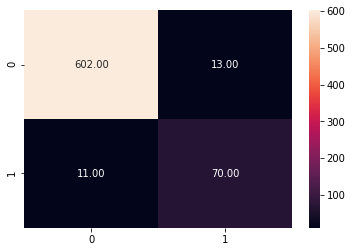

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val,predictions),annot=True,fmt=".2f")

#### **Final Predictions**

In [ ]:
preds = model.predict(test_pixel_data)
#
predictions = []
for i in preds:
  if i[0] > 0.5:
    predictions.append(1)
  else:
    predictions.append(0)
#
result = pd.DataFrame(predictions,columns=['prediction'])
#
print(result.value_counts())
#
result.to_csv('ResNet50_full_trained.csv',index=False)

prediction
0             767
1             103
dtype: int64


#### **Resnet50 Dphi scores :89.75609756097562**

#### **Grad-CAM**

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import cv2

#### **Function to display images**

In [ ]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

##**Arguement Parser**

********************************************

In [ ]:
from tensorflow.keras.applications import ResNet152V2

In [ ]:
def build_model():
    model = Sequential()
    
    conv_base = ResNet152V2(input_shape=(224,224,3), include_top=False, pooling='max',weights='imagenet')
    model.add(conv_base)
    model.add(BatchNormalization())
    model.add(Dense(2048, activation='relu',  kernel_regularizer=l1_l2(0.01)))
    #model.add(BatchNormalization())
    #model.add(Dense(2048, activation='relu',  kernel_regularizer=l1_l2(0.01)))
    #model.add(BatchNormalization())
    #model.add(Dense(2048, activation='relu',  kernel_regularizer=l1_l2(0.01)))
    #model.add(BatchNormalization())
    #model.add(Dense(1024, activation='relu', kernel_regularizer=l1_l2(0.01)))
    #model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))
    #for layer in model.layers:
    #  layer.trainable = True
    train_layers = [layer for layer in conv_base.layers[::-1][:5]]
    
    for layer in conv_base.layers:
      if layer in train_layers:
        layer.trainable = True
    
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy',get_f1])
    
    return model


In [ ]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 2048)              58331648  
_________________________________________________________________
batch_normalization_5 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_5 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2049      
Total params: 62,538,241
Trainable params: 62,390,401
Non-trainable params: 147,840
_________________________________________________________________


In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=87,
                    epochs=100,
                    validation_data=val_generator,
                    validation_steps=22,
                    callbacks=[cbs],
                    class_weight={0:1,1:2})

Epoch 1/100
87/87 [==============================] - 71s 818ms/step - loss: 653.4847 - accuracy: 0.9062 - get_f1: 0.6157 - val_loss: 493.6855 - val_accuracy: 0.8865 - val_get_f1: 0.0281
Epoch 2/100
87/87 [==============================] - 71s 814ms/step - loss: 365.5524 - accuracy: 0.9687 - get_f1: 0.8531 - val_loss: 249.1924 - val_accuracy: 0.9138 - val_get_f1: 0.3386
Epoch 3/100
87/87 [==============================] - 71s 817ms/step - loss: 163.1143 - accuracy: 0.9856 - get_f1: 0.9270 - val_loss: 89.1624 - val_accuracy: 0.9583 - val_get_f1: 0.7617
Epoch 4/100
87/87 [==============================] - 71s 819ms/step - loss: 43.7298 - accuracy: 0.9978 - get_f1: 0.9895 - val_loss: 10.8226 - val_accuracy: 0.9626 - val_get_f1: 0.7967
Epoch 5/100
87/87 [==============================] - 71s 819ms/step - loss: 2.8789 - accuracy: 0.9885 - get_f1: 0.9439 - val_loss: 0.9052 - val_accuracy: 0.9339 - val_get_f1: 0.5628
Epoch 6/100
87/87 [==============================] - 71s 818ms/step - loss: 0

In [ ]:
preds =  model.predict(X_val/255.0)
predictions = []
for i in preds:
  if i[0] > 0.5:
    predictions.append(1)
  else:
    predictions.append(0)

#
from sklearn.metrics import f1_score
f1_score(y_val,predictions)

0.8481012658227849

In [ ]:
preds = model.predict(test_pixel_data)
#
predictions = []
for i in preds:
  if i[0] > 0.5:
    predictions.append(1)
  else:
    predictions.append(0)
#
result = pd.DataFrame(predictions,columns=['prediction'])
#
print(result.value_counts())
#
result.to_csv('ResNet152V2_full_trained.csv',index=False)

prediction
0             764
1             106
dtype: int64


#### **Dphi Score 87.5**

####**DenseNet169**

******************************************************************************

In [ ]:
from tensorflow.keras.applications import DenseNet169

In [ ]:
def build_model():
    model = Sequential()
    
    conv_base = DenseNet169(input_shape=(224,224,3), include_top=False, pooling='max',weights='imagenet')
    model.add(conv_base)
    model.add(BatchNormalization())
    model.add(Dense(2048, activation='relu',  kernel_regularizer=l1_l2(0.01)))
    """
    model.add(BatchNormalization())
    model.add(Dense(2048, activation='relu',  kernel_regularizer=l1_l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dense(2048, activation='relu',  kernel_regularizer=l1_l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dense(1024, activation='relu', kernel_regularizer=l1_l2(0.01)))
    model.add(BatchNormalization())"""
    model.add(Dense(1, activation='sigmoid'))
    for layer in model.layers:
      layer.trainable = True
    #train_layers = [layer for layer in conv_base.layers[::-1][:5]]
    """
    for layer in conv_base.layers:
      if layer in train_layers:
        layer.trainable = True
    """
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy',get_f1])
    
    return model


In [ ]:
model = build_model()
model.summary()

51879936/51877672 [==============================] - 4s 0us/step
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet169 (Functional)     (None, 1664)              12642880  
_________________________________________________________________
batch_normalization_5 (Batch (None, 1664)              6656      
_________________________________________________________________
dense_8 (Dense)              (None, 2048)              3409920   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 2049      
Total params: 16,061,505
Trainable params: 15,899,777
Non-trainable params: 161,728
_________________________________________________________________


In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=87,
                    epochs=100,
                    validation_data=val_generator,
                    validation_steps=22,
                    callbacks=[cbs],
                    class_weight={0:1,1:2})

Epoch 1/100
87/87 [==============================] - 80s 920ms/step - loss: 563.8148 - accuracy: 0.9041 - get_f1: 0.6890 - val_loss: 432.0593 - val_accuracy: 0.9239 - val_get_f1: 0.5201
Epoch 2/100
87/87 [==============================] - 77s 884ms/step - loss: 325.6119 - accuracy: 0.9813 - get_f1: 0.9032 - val_loss: 228.2778 - val_accuracy: 0.9353 - val_get_f1: 0.6797
Epoch 3/100
87/87 [==============================] - 77s 883ms/step - loss: 154.5846 - accuracy: 0.9943 - get_f1: 0.9469 - val_loss: 90.5258 - val_accuracy: 0.9023 - val_get_f1: 0.6573
Epoch 4/100
87/87 [==============================] - 77s 887ms/step - loss: 48.5107 - accuracy: 0.9914 - get_f1: 0.9369 - val_loss: 16.4518 - val_accuracy: 0.9339 - val_get_f1: 0.7033
Epoch 5/100
87/87 [==============================] - 77s 886ms/step - loss: 4.8200 - accuracy: 0.9896 - get_f1: 0.9447 - val_loss: 0.9422 - val_accuracy: 0.9095 - val_get_f1: 0.6635
Epoch 6/100
87/87 [==============================] - 77s 887ms/step - loss: 0

******************************************************************************

#### **Evaluation of the model**

In [ ]:
preds =  model.predict(X_val/255.0)
predictions = []
for i in preds:
  if i[0] >= 0.5:
    predictions.append(1)
  else:
    predictions.append(0)

#
from sklearn.metrics import f1_score
f1_score(y_val,predictions)

0.7922077922077922

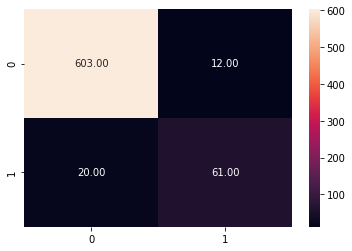

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val,predictions),annot=True,fmt=".2f")

#### **Predict on the resultset**

In [ ]:
preds = model.predict(test_pixel_data)
#
predictions = []
for i in preds:
  if i[0] >= 0.5:
    predictions.append(1)
  else:
    predictions.append(0)
#
result = pd.DataFrame(predictions,columns=['prediction'])
#
result.value_counts()
#
result.to_csv('denseNet169_full_trained1.csv',index=False)

In [ ]:
result.value_counts()

prediction
0             777
1              93
dtype: int64

#### **Dphi Scores :86.91588785046729 for Densenet169**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:

model.save("/content/drive/MyDrive/AV_Hack/resnet169")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/AV_Hack/resnet169/assets


In [ ]:
"""from tensorflow import keras
model = keras.models.load_model('path/to/location')"""


#### **Gradient weighted Class Activation Map**

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import cv2

#### **Function to display images**

In [ ]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

#### **Arguement Parser**

In [ ]:
train = pd.read_csv("/content/content/covid_image_data/Training_set_covid.csv")
train[train['label']==1].head()

,filename,label
0,Image_1.jpg,1
11,Image_12.jpg,1
14,Image_15.jpg,1
23,Image_24.jpg,1
35,Image_36.jpg,1


In [ ]:
args = {
	"image": "/content/content/covid_image_data/train/Image_1.jpg",
	"model": "resnet"
}

In [ ]:
# load the original image from disk (in OpenCV format) and then
# resize the image to its target dimensions
orig = cv2.imread(args["image"])
resized = cv2.resize(orig, (224, 224))

In [ ]:
# load the input image from disk (in Keras/TensorFlow format) and
# preprocess it
image = load_img(args["image"], target_size=(224, 224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = imagenet_utils.preprocess_input(image)

In [ ]:
image.shape

(1, 224, 224, 3)

In [ ]:
preds = model.predict(image)

In [ ]:
preds[0][0]

1.0

In [ ]:
# use the network to make predictions on the input image and find
# the class label index with the largest corresponding probability
preds = model.predict(image)
i = preds[0][0]

# decode the ImageNet predictions to obtain the human-readable label
if i == 1:
  label = "Covid19 Infected"
else:
  label = "Covid19 Not Infected"
label = "{}: {:.2f}%".format(label, preds[0][0]* 100)
print("[INFO] {}".format(label))

[INFO] Covid19 Infected: 100.00%


In [ ]:
for layer in reversed(model.layers):
  print(layer.name)
  print(layer.output_shape)

dense_6
(None, 1)
dense_5
(None, 2048)
batch_normalization_5
(None, 2048)
resnet152v2
(None, 2048)


In [ ]:
class GradCAM:
	def __init__(self, model, classIdx, layerName=None):
		# store the model, the class index used to measure the class
		# activation map, and the layer to be used when visualizing
		# the class activation map
		self.model = model
		self.classIdx = classIdx
		self.layerName = layerName

		# if the layer name is None, attempt to automatically find
		# the target output layer
		if self.layerName is None:
			self.layerName = self.find_target_layer()

	def find_target_layer(self):
		# attempt to find the final convolutional layer in the network
		# by looping over the layers of the network in reverse order
		for layer in reversed(self.model.layers):
			# check to see if the layer has a 4D output
			if len(layer.output_shape) == 4:
				return layer.name

		# otherwise, we could not find a 4D layer so the GradCAM
		# algorithm cannot be applied
		raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")

	def compute_heatmap(self, image, eps=1e-8):
		# construct our gradient model by supplying (1) the inputs
		# to our pre-trained model, (2) the output of the (presumably)
		# final 4D layer in the network, and (3) the output of the
		# softmax activations from the model
		gradModel = Model(
			inputs=[self.model.inputs],
			outputs=[self.model.get_layer(self.layerName).output, 
				self.model.output])

		# record operations for automatic differentiation
		with tf.GradientTape() as tape:
			# cast the image tensor to a float-32 data type, pass the
			# image through the gradient model, and grab the loss
			# associated with the specific class index
			inputs = tf.cast(image, tf.float32)
			(convOutputs, predictions) = gradModel(inputs)
			loss = predictions[:, self.classIdx]

		# use automatic differentiation to compute the gradients
		grads = tape.gradient(loss, convOutputs)

		# compute the guided gradients
		castConvOutputs = tf.cast(convOutputs > 0, "float32")
		castGrads = tf.cast(grads > 0, "float32")
		guidedGrads = castConvOutputs * castGrads * grads

		# the convolution and guided gradients have a batch dimension
		# (which we don't need) so let's grab the volume itself and
		# discard the batch
		convOutputs = convOutputs[0]
		guidedGrads = guidedGrads[0]

		# compute the average of the gradient values, and using them
		# as weights, compute the ponderation of the filters with
		# respect to the weights
		weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
		cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

		# grab the spatial dimensions of the input image and resize
		# the output class activation map to match the input image
		# dimensions
		(w, h) = (image.shape[2], image.shape[1])
		heatmap = cv2.resize(cam.numpy(), (w, h))

		# normalize the heatmap such that all values lie in the range
		# [0, 1], scale the resulting values to the range [0, 255],
		# and then convert to an unsigned 8-bit integer
		numer = heatmap - np.min(heatmap)
		denom = (heatmap.max() - heatmap.min()) + eps
		heatmap = numer / denom
		heatmap = (heatmap * 255).astype("uint8")

		# return the resulting heatmap to the calling function
		return heatmap

	def overlay_heatmap(self, heatmap, image, alpha=0.5,
		colormap=cv2.COLORMAP_VIRIDIS):
		# apply the supplied color map to the heatmap and then
		# overlay the heatmap on the input image
		heatmap = cv2.applyColorMap(heatmap, colormap)
		output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)

		# return a 2-tuple of the color mapped heatmap and the output,
		# overlaid image
		return (heatmap, output)

In [ ]:
# initialize our gradient class activation map and build the heatmap
cam = GradCAM(model, i)
heatmap = cam.compute_heatmap(image)

# resize the resulting heatmap to the original input image dimensions
# and then overlay heatmap on top of the image
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)

ValueError: ignored

In [ ]:
# draw the predicted label on the output image
cv2.rectangle(output, (0, 0), (340, 40), (0, 0, 0), -1)
cv2.putText(output, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,
	0.8, (255, 255, 255), 2)

# display the original image and resulting heatmap and output image
# to our screen
output = np.vstack([orig, heatmap, output])
output = imutils.resize(output, height=700)
plt_imshow("Output", output)

#### **Keras Model Selection**

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import inspect
from tqdm import tqdm

# Set batch size for training and validation
batch_size = 32

In [ ]:
# List all available models
model_dictionary = {m[0]:m[1] for m in inspect.getmembers(tf.keras.applications, inspect.isfunction)}

In [ ]:
model_dictionary 

{'DenseNet121': <function tensorflow.python.keras.applications.densenet.DenseNet121>,
 'DenseNet169': <function tensorflow.python.keras.applications.densenet.DenseNet169>,
 'DenseNet201': <function tensorflow.python.keras.applications.densenet.DenseNet201>,
 'EfficientNetB0': <function tensorflow.python.keras.applications.efficientnet.EfficientNetB0>,
 'EfficientNetB1': <function tensorflow.python.keras.applications.efficientnet.EfficientNetB1>,
 'EfficientNetB2': <function tensorflow.python.keras.applications.efficientnet.EfficientNetB2>,
 'EfficientNetB3': <function tensorflow.python.keras.applications.efficientnet.EfficientNetB3>,
 'EfficientNetB4': <function tensorflow.python.keras.applications.efficientnet.EfficientNetB4>,
 'EfficientNetB5': <function tensorflow.python.keras.applications.efficientnet.EfficientNetB5>,
 'EfficientNetB6': <function tensorflow.python.keras.applications.efficientnet.EfficientNetB6>,
 'EfficientNetB7': <function tensorflow.python.keras.applications.effi

In [ ]:
int(num_train/batch_size)

86

In [ ]:
# Loop over each model available in Keras
# Number of training examples and labels
num_train = len(list(X_train))
num_validation = len(list(X_val))
num_classes = 1
num_iterations = int(num_train/batch_size)

model_benchmarks = {'model_name': [], 'num_model_params': [], 'validation_accuracy': []}
for model_name, model in tqdm(model_dictionary.items()):
    # Special handling for "NASNetLarge" since it requires input images with size (331,331)
    if model_name != 'NASNetLarge':
        input_shape=(224,224,3)
        train_processed = X_train
        validation_processed = X_val

    # load the pre-trained model with global average pooling as the last layer and freeze the model weights
        pre_trained_model = model(include_top=False, pooling='avg', input_shape=input_shape)
        pre_trained_model.trainable = False

    # custom modifications on top of pre-trained model
        clf_model = tf.keras.models.Sequential()
        clf_model.add(pre_trained_model)
        clf_model.add(tf.keras.layers.Dense(num_classes, activation='sigmoid'))
        clf_model.compile(loss='binary_crossentropy', metrics=['accuracy'])
        history = clf_model.fit(train_generator,
                                epochs=3, 
                                validation_data=val_generator, 
                                steps_per_epoch=num_iterations)

    # Calculate all relevant metrics
        model_benchmarks['model_name'].append(model_name)
        model_benchmarks['num_model_params'].append(pre_trained_model.count_params())
        model_benchmarks['validation_accuracy'].append(history.history['val_accuracy'][-1])


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 1/3
86/86 [==============================] - 13s 150ms/step - loss: 0.3118 - accuracy: 0.8753 - val_loss: 0.2814 - val_accuracy: 0.8908
Epoch 2/3
86/86 [==============================] - 10s 113ms/step - loss: 0.2372 - accuracy: 0.8975 - val_loss: 0.2328 - val_accuracy: 0.8937
Epoch 3/3
86/86 [==============================] - 10s 114ms/step - loss: 0.2034 - accuracy: 0.9088 - val_loss: 0.2195 - val_accuracy: 0.8994



  4%|▍         | 1/26 [00:49<20:29, 49.18s/it]

51879936/51877672 [==============================] - 0s 0us/step
Epoch 1/3
86/86 [==============================] - 14s 169ms/step - loss: 0.2750 - accuracy: 0.8884 - val_loss: 0.2263 - val_accuracy: 0.8994
Epoch 2/3
86/86 [==============================] - 12s 138ms/step - loss: 0.2064 - accuracy: 0.9077 - val_loss: 0.1920 - val_accuracy: 0.9210
Epoch 3/3
86/86 [==============================] - 12s 138ms/step - loss: 0.1761 - accuracy: 0.9226 - val_loss: 0.1940 - val_accuracy: 0.9325



  8%|▊         | 2/26 [01:40<19:57, 49.90s/it]

74842112/74836368 [==============================] - 1s 0us/step
Epoch 1/3
86/86 [==============================] - 18s 212ms/step - loss: 0.2951 - accuracy: 0.8862 - val_loss: 0.2508 - val_accuracy: 0.8951
Epoch 2/3
86/86 [==============================] - 15s 175ms/step - loss: 0.2234 - accuracy: 0.9040 - val_loss: 0.2084 - val_accuracy: 0.8994
Epoch 3/3
86/86 [==============================] - 15s 177ms/step - loss: 0.1908 - accuracy: 0.9186 - val_loss: 0.1898 - val_accuracy: 0.9124



 12%|█▏        | 3/26 [02:45<20:51, 54.43s/it]

16711680/16705208 [==============================] - 0s 0us/step
Epoch 1/3
86/86 [==============================] - 8s 94ms/step - loss: 0.3827 - accuracy: 0.8771 - val_loss: 0.3602 - val_accuracy: 0.8836
Epoch 2/3
86/86 [==============================] - 7s 77ms/step - loss: 0.3643 - accuracy: 0.8833 - val_loss: 0.3595 - val_accuracy: 0.8836
Epoch 3/3
86/86 [==============================] - 7s 77ms/step - loss: 0.3643 - accuracy: 0.8822 - val_loss: 0.3595 - val_accuracy: 0.8836



 15%|█▌        | 4/26 [03:15<17:12, 46.94s/it]

27025408/27018416 [==============================] - 0s 0us/step
Epoch 1/3
86/86 [==============================] - 10s 120ms/step - loss: 0.3950 - accuracy: 0.8826 - val_loss: 0.3611 - val_accuracy: 0.8836
Epoch 2/3
86/86 [==============================] - 9s 102ms/step - loss: 0.3724 - accuracy: 0.8837 - val_loss: 0.3598 - val_accuracy: 0.8836
Epoch 3/3
86/86 [==============================] - 9s 103ms/step - loss: 0.3644 - accuracy: 0.8833 - val_loss: 0.3659 - val_accuracy: 0.8836



 19%|█▉        | 5/26 [03:53<15:28, 44.22s/it]

31793152/31790344 [==============================] - 0s 0us/step
Epoch 1/3
86/86 [==============================] - 11s 129ms/step - loss: 0.3703 - accuracy: 0.8830 - val_loss: 0.3596 - val_accuracy: 0.8836
Epoch 2/3
86/86 [==============================] - 9s 108ms/step - loss: 0.3654 - accuracy: 0.8819 - val_loss: 0.3610 - val_accuracy: 0.8836
Epoch 3/3
86/86 [==============================] - 9s 108ms/step - loss: 0.3645 - accuracy: 0.8826 - val_loss: 0.3597 - val_accuracy: 0.8836



 23%|██▎       | 6/26 [04:33<14:24, 43.22s/it]

43941888/43941136 [==============================] - 0s 0us/step
Epoch 1/3
86/86 [==============================] - 14s 166ms/step - loss: 0.3697 - accuracy: 0.8757 - val_loss: 0.3688 - val_accuracy: 0.8836
Epoch 2/3
86/86 [==============================] - 12s 139ms/step - loss: 0.3678 - accuracy: 0.8822 - val_loss: 0.3613 - val_accuracy: 0.8836
Epoch 3/3
86/86 [==============================] - 12s 139ms/step - loss: 0.3654 - accuracy: 0.8837 - val_loss: 0.3594 - val_accuracy: 0.8836



 27%|██▋       | 7/26 [05:23<14:19, 45.26s/it]

71688192/71686520 [==============================] - 1s 0us/step
Epoch 1/3
86/86 [==============================] - 18s 214ms/step - loss: 0.3736 - accuracy: 0.8728 - val_loss: 0.3663 - val_accuracy: 0.8836
Epoch 2/3
86/86 [==============================] - 16s 183ms/step - loss: 0.3676 - accuracy: 0.8830 - val_loss: 0.3604 - val_accuracy: 0.8836
Epoch 3/3
86/86 [==============================] - 16s 184ms/step - loss: 0.3644 - accuracy: 0.8834 - val_loss: 0.3674 - val_accuracy: 0.8836



 31%|███       | 8/26 [06:30<15:29, 51.65s/it]

115269632/115263384 [==============================] - 0s 0us/step
Epoch 1/3
86/86 [==============================] - 25s 292ms/step - loss: 0.3735 - accuracy: 0.8735 - val_loss: 0.3607 - val_accuracy: 0.8836
Epoch 2/3
86/86 [==============================] - 22s 252ms/step - loss: 0.3680 - accuracy: 0.8822 - val_loss: 0.3730 - val_accuracy: 0.8836
Epoch 3/3
86/86 [==============================] - 22s 253ms/step - loss: 0.3663 - accuracy: 0.8833 - val_loss: 0.3617 - val_accuracy: 0.8836



 35%|███▍      | 9/26 [07:57<17:38, 62.27s/it]

165240832/165234480 [==============================] - 2s 0us/step
Epoch 1/3
86/86 [==============================] - 32s 373ms/step - loss: 0.3742 - accuracy: 0.8800 - val_loss: 0.3696 - val_accuracy: 0.8836
Epoch 2/3
86/86 [==============================] - 28s 327ms/step - loss: 0.3649 - accuracy: 0.8830 - val_loss: 0.3630 - val_accuracy: 0.8836
Epoch 3/3
86/86 [==============================] - 28s 327ms/step - loss: 0.3672 - accuracy: 0.8830 - val_loss: 0.3608 - val_accuracy: 0.8836



 38%|███▊      | 10/26 [09:49<20:34, 77.17s/it]

258080768/258076736 [==============================] - 2s 0us/step
Epoch 1/3
86/86 [==============================] - 42s 488ms/step - loss: 0.3760 - accuracy: 0.8753 - val_loss: 0.3627 - val_accuracy: 0.8836
Epoch 2/3
86/86 [==============================] - 38s 441ms/step - loss: 0.3674 - accuracy: 0.8833 - val_loss: 0.3597 - val_accuracy: 0.8836
Epoch 3/3
86/86 [==============================] - 38s 443ms/step - loss: 0.3710 - accuracy: 0.8822 - val_loss: 0.3594 - val_accuracy: 0.8836



 42%|████▏     | 11/26 [12:15<24:26, 97.79s/it]

219062272/219055592 [==============================] - 2s 0us/step
Epoch 1/3
86/86 [==============================] - 21s 247ms/step - loss: 0.3340 - accuracy: 0.8775 - val_loss: 0.2917 - val_accuracy: 0.8894
Epoch 2/3
86/86 [==============================] - 18s 205ms/step - loss: 0.2656 - accuracy: 0.8949 - val_loss: 0.2672 - val_accuracy: 0.8922
Epoch 3/3
86/86 [==============================] - 18s 207ms/step - loss: 0.2340 - accuracy: 0.9080 - val_loss: 0.2505 - val_accuracy: 0.8908



 46%|████▌     | 12/26 [13:29<21:10, 90.74s/it]

87916544/87910968 [==============================] - 0s 0us/step
Epoch 1/3
86/86 [==============================] - 9s 108ms/step - loss: 0.3215 - accuracy: 0.8811 - val_loss: 0.2727 - val_accuracy: 0.8908
Epoch 2/3
86/86 [==============================] - 8s 88ms/step - loss: 0.2557 - accuracy: 0.8917 - val_loss: 0.2716 - val_accuracy: 0.8908
Epoch 3/3
86/86 [==============================] - 8s 88ms/step - loss: 0.2334 - accuracy: 0.9037 - val_loss: 0.2414 - val_accuracy: 0.8951



 50%|█████     | 13/26 [14:01<15:48, 72.99s/it]

17227776/17225924 [==============================] - 0s 0us/step
Epoch 1/3
86/86 [==============================] - 5s 55ms/step - loss: 0.2872 - accuracy: 0.8866 - val_loss: 0.2311 - val_accuracy: 0.8994
Epoch 2/3
86/86 [==============================] - 4s 47ms/step - loss: 0.1871 - accuracy: 0.9215 - val_loss: 0.2012 - val_accuracy: 0.9080
Epoch 3/3
86/86 [==============================] - 4s 47ms/step - loss: 0.1598 - accuracy: 0.9331 - val_loss: 0.1820 - val_accuracy: 0.9224



 54%|█████▍    | 14/26 [14:16<11:09, 55.78s/it]

9412608/9406464 [==============================] - 0s 0us/step
Epoch 1/3
86/86 [==============================] - 7s 87ms/step - loss: 0.3018 - accuracy: 0.8771 - val_loss: 0.2390 - val_accuracy: 0.9023
Epoch 2/3
86/86 [==============================] - 4s 52ms/step - loss: 0.2046 - accuracy: 0.9095 - val_loss: 0.2019 - val_accuracy: 0.9080
Epoch 3/3
86/86 [==============================] - 4s 51ms/step - loss: 0.1757 - accuracy: 0.9218 - val_loss: 0.1880 - val_accuracy: 0.9181



 58%|█████▊    | 15/26 [14:37<08:16, 45.14s/it]

19996672/19993432 [==============================] - 0s 0us/step
Epoch 1/3
86/86 [==============================] - 11s 123ms/step - loss: 0.3213 - accuracy: 0.8768 - val_loss: 0.2815 - val_accuracy: 0.8865
Epoch 2/3
86/86 [==============================] - 7s 83ms/step - loss: 0.2573 - accuracy: 0.8920 - val_loss: 0.2466 - val_accuracy: 0.8994
Epoch 3/3
86/86 [==============================] - 7s 82ms/step - loss: 0.2303 - accuracy: 0.9019 - val_loss: 0.2339 - val_accuracy: 0.9023



 65%|██████▌   | 17/26 [15:19<05:41, 37.93s/it]

171450368/171446536 [==============================] - 1s 0us/step
Epoch 1/3
86/86 [==============================] - 21s 240ms/step - loss: 0.3820 - accuracy: 0.8451 - val_loss: 0.3242 - val_accuracy: 0.8836
Epoch 2/3
86/86 [==============================] - 19s 218ms/step - loss: 0.3105 - accuracy: 0.8830 - val_loss: 0.3043 - val_accuracy: 0.8836
Epoch 3/3
86/86 [==============================] - 19s 219ms/step - loss: 0.2922 - accuracy: 0.8826 - val_loss: 0.2944 - val_accuracy: 0.8836



 69%|██████▉   | 18/26 [16:27<06:16, 47.01s/it]

171319296/171317808 [==============================] - 2s 0us/step
Epoch 1/3
86/86 [==============================] - 18s 210ms/step - loss: 0.2773 - accuracy: 0.8891 - val_loss: 0.2336 - val_accuracy: 0.9023
Epoch 2/3
86/86 [==============================] - 16s 191ms/step - loss: 0.2033 - accuracy: 0.9160 - val_loss: 0.2098 - val_accuracy: 0.9095
Epoch 3/3
86/86 [==============================] - 17s 192ms/step - loss: 0.1721 - accuracy: 0.9335 - val_loss: 0.1959 - val_accuracy: 0.9296



 73%|███████▎  | 19/26 [17:31<06:03, 51.98s/it]

234700800/234698864 [==============================] - 1s 0us/step
Epoch 1/3
86/86 [==============================] - 29s 336ms/step - loss: 0.3720 - accuracy: 0.8666 - val_loss: 0.3425 - val_accuracy: 0.8836
Epoch 2/3
86/86 [==============================] - 27s 314ms/step - loss: 0.3350 - accuracy: 0.8833 - val_loss: 0.3364 - val_accuracy: 0.8836
Epoch 3/3
86/86 [==============================] - 27s 315ms/step - loss: 0.3252 - accuracy: 0.8837 - val_loss: 0.3229 - val_accuracy: 0.8836



 77%|███████▋  | 20/26 [19:08<06:33, 65.51s/it]

234553344/234545216 [==============================] - 3s 0us/step
Epoch 1/3
86/86 [==============================] - 25s 296ms/step - loss: 0.2542 - accuracy: 0.8975 - val_loss: 0.2157 - val_accuracy: 0.8966
Epoch 2/3
86/86 [==============================] - 24s 276ms/step - loss: 0.1778 - accuracy: 0.9273 - val_loss: 0.1823 - val_accuracy: 0.9239
Epoch 3/3
86/86 [==============================] - 24s 277ms/step - loss: 0.1511 - accuracy: 0.9389 - val_loss: 0.1696 - val_accuracy: 0.9239



 81%|████████  | 21/26 [20:37<06:02, 72.60s/it]

94773248/94765736 [==============================] - 1s 0us/step
Epoch 1/3
86/86 [==============================] - 12s 141ms/step - loss: 0.3621 - accuracy: 0.8731 - val_loss: 0.3528 - val_accuracy: 0.8836
Epoch 2/3
86/86 [==============================] - 11s 133ms/step - loss: 0.3334 - accuracy: 0.8833 - val_loss: 0.3290 - val_accuracy: 0.8836
Epoch 3/3
86/86 [==============================] - 11s 132ms/step - loss: 0.3131 - accuracy: 0.8840 - val_loss: 0.3213 - val_accuracy: 0.8836



 85%|████████▍ | 22/26 [21:18<04:12, 63.12s/it]

94674944/94668760 [==============================] - 1s 0us/step
Epoch 1/3
86/86 [==============================] - 10s 118ms/step - loss: 0.2905 - accuracy: 0.8880 - val_loss: 0.2352 - val_accuracy: 0.8937
Epoch 2/3
86/86 [==============================] - 9s 109ms/step - loss: 0.1956 - accuracy: 0.9229 - val_loss: 0.1903 - val_accuracy: 0.9224
Epoch 3/3
86/86 [==============================] - 10s 111ms/step - loss: 0.1637 - accuracy: 0.9349 - val_loss: 0.1795 - val_accuracy: 0.9224



 88%|████████▊ | 23/26 [21:55<02:45, 55.18s/it]

58892288/58889256 [==============================] - 0s 0us/step
Epoch 1/3
86/86 [==============================] - 16s 180ms/step - loss: 0.4604 - accuracy: 0.7866 - val_loss: 0.3255 - val_accuracy: 0.8836
Epoch 2/3
86/86 [==============================] - 13s 151ms/step - loss: 0.3033 - accuracy: 0.8830 - val_loss: 0.2939 - val_accuracy: 0.8836
Epoch 3/3
86/86 [==============================] - 13s 151ms/step - loss: 0.2701 - accuracy: 0.8859 - val_loss: 0.2732 - val_accuracy: 0.8807



 92%|█████████▏| 24/26 [22:39<01:43, 51.98s/it]

80142336/80134624 [==============================] - 1s 0us/step
Epoch 1/3
86/86 [==============================] - 16s 183ms/step - loss: 0.3348 - accuracy: 0.8830 - val_loss: 0.3105 - val_accuracy: 0.8836
Epoch 2/3
86/86 [==============================] - 16s 181ms/step - loss: 0.2879 - accuracy: 0.8822 - val_loss: 0.2853 - val_accuracy: 0.8851
Epoch 3/3
86/86 [==============================] - 16s 182ms/step - loss: 0.2603 - accuracy: 0.8877 - val_loss: 0.2645 - val_accuracy: 0.8851



 96%|█████████▌| 25/26 [23:29<00:51, 51.26s/it]

83689472/83683744 [==============================] - 1s 0us/step
Epoch 1/3
86/86 [==============================] - 17s 197ms/step - loss: 0.3087 - accuracy: 0.8844 - val_loss: 0.2817 - val_accuracy: 0.8966
Epoch 2/3
86/86 [==============================] - 15s 179ms/step - loss: 0.2531 - accuracy: 0.8946 - val_loss: 0.2458 - val_accuracy: 0.8937
Epoch 3/3
86/86 [==============================] - 15s 180ms/step - loss: 0.2274 - accuracy: 0.9051 - val_loss: 0.2384 - val_accuracy: 0.8937



100%|██████████| 26/26 [24:23<00:00, 56.28s/it]


In [ ]:
# Convert Results to DataFrame for easy viewing
benchmark_df = pd.DataFrame(model_benchmarks)
benchmark_df.sort_values('num_model_params', inplace=True) # sort in ascending order of num_model_params column
benchmark_df.to_csv('benchmark_df.csv', index=False) # write results to csv file
benchmark_df

,model_name,num_model_params,validation_accuracy
14,MobileNetV2,2257984,0.918103
13,MobileNet,3228864,0.922414
3,EfficientNetB0,4049571,0.883621
15,NASNetMobile,4269716,0.902299
4,EfficientNetB1,6575239,0.883621
0,DenseNet121,7037504,0.899425
5,EfficientNetB2,7768569,0.883621
6,EfficientNetB3,10783535,0.883621
1,DenseNet169,12642880,0.932471
22,VGG16,14714688,0.880747


In [ ]:
benchmark_df = benchmark_df.sort_values(by='validation_accuracy')

In [ ]:
benchmark_df.to_csv("Keras_pretrained_model_val_accuracy.csv",index=False)